# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Get and Unzip Dataset

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kirara14","key":"2aa2bee50a4ae34b1d9f1141695c644a"}'}

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:25<00:00, 213MB/s]
100% 2.70G/2.70G [00:25<00:00, 115MB/s]


In [ ]:
!unzip *.zip

# Preprocessing

## Dataset 1

In [ ]:
base_dir = '/content'
dataset_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
subfolders = ['train', 'valid']

In [ ]:
# List files
print(os.listdir(os.path.join(dataset_path, 'train')))

['Strawberry___Leaf_scorch', 'Potato___Late_blight', 'Pepper,_bell___healthy', 'Grape___Esca_(Black_Measles)', 'Peach___Bacterial_spot', 'Blueberry___healthy', 'Strawberry___healthy', 'Pepper,_bell___Bacterial_spot', 'Tomato___Bacterial_spot', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Soybean___healthy', 'Grape___healthy', 'Potato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Leaf_Mold', 'Tomato___Early_blight', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Apple_scab', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Raspberry___healthy', 'Tomato___Late_blight', 'Apple___healthy', 'Tomato___Tomato_mosaic_virus', 'Tomato___Target_Spot', 'Squash___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Apple___Black_rot', 'Potato___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Apple___Cedar_apple_rust', 'Peach___healthy

## Dataset 2

In [ ]:
from google.colab import drive 
base_dir = '/content/gdrive'
drive.mount(base_dir)

Mounted at /content/gdrive


In [ ]:
dataset_path = '/content/gdrive/My Drive/ML/PlantDoc-Dataset-master'
subfolders = ['train', 'test']

In [ ]:
# List files
print(os.listdir(os.path.join(dataset_path, 'train')))

['Tomato leaf bacterial spot', 'Tomato leaf mosaic virus', 'Tomato mold leaf', 'Tomato leaf late blight', 'Tomato leaf', 'Tomato Septoria leaf spot', 'Tomato Early blight leaf', 'Tomato two spotted spider mites leaf', 'Strawberry leaf', 'Tomato leaf yellow virus', 'Potato leaf late blight', 'Corn leaf blight', 'Peach leaf', 'grape leaf', 'Soyabean leaf', 'grape leaf black rot', 'Corn rust leaf', 'Squash Powdery mildew leaf', 'Potato leaf early blight', 'Raspberry leaf', 'Apple Scab Leaf', 'Apple rust leaf', 'Blueberry leaf', 'Corn Gray leaf spot', 'Cherry leaf', 'Bell_pepper leaf spot', 'Bell_pepper leaf', 'Apple leaf']


## Rename Folders

In [ ]:
# Function to rename folder or move files to another folder
def move_or_rename(folder, old_path, new_path):
    # Pindahkan saja jika sudah ada
      if folder in status:                              # if 'healthy' in status
        files = os.listdir(old_path)                    # file di 'Tomato___healthy'
        
        # Iterasi semua file
        for f in files:
          src_path = os.path.join(old_path, f)          # 'Tomato___healthy'
          dst_path = os.path.join(new_path, f)          # 'healthy'
          os.rename(src_path, dst_path)

      else:                                             # if 'healthy' not in status
        os.rename(old_path, new_path)
        status.append(folder)                           # insert 'healthy' to status

In [ ]:
status = []

In [ ]:
# For all (train and valid) folders
for sub in subfolders:
  sub_path = os.path.join(dataset_path, sub)
  
  for folder in os.listdir(sub_path):
    # Hapus kata sebelum "___" jika ada
    if "___" in folder:
      id = folder.rfind("___")
      plant_name = folder[:id]

      # Me-rename folder
      old_path = os.path.join(sub_path, folder)
      new_path = os.path.join(sub_path, folder[id+3:])

      move_or_rename(folder[id+3:], old_path, new_path)

      # Hapus jenis tanaman jika masih ada 
      folder = folder[id+3:]
      if plant_name in folder:
        plant_len = len(plant_name)

        # Me-rename folder
        old_path = new_path 
        new_path = os.path.join(sub_path, folder[plant_len+1:])

        move_or_rename(folder[plant_len+1:], old_path, new_path)

  status = []

In [ ]:
# Delete empty folders
for sub in subfolders:
  sub_path = os.path.join(dataset_path, sub)
  
  for folder in os.listdir(sub_path):
    if not os.listdir(os.path.join(sub_path, folder)):
        print(f'Deleting {os.path.join(sub_path, folder)}...')
        os.removedirs(os.path.join(sub_path, folder))

Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Raspberry___healthy...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___healthy...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___healthy...
Deleting /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot...
Deleting /content/N

In [ ]:
# Semua status tanaman dan jumlahnya
directory_files = os.listdir(os.path.join(dataset_path, 'train'))
print(f'Status penyakit tanaman: {directory_files}')
print(f'Jumlah: {len(directory_files)}')

Status penyakit tanaman: ['Septoria_leaf_spot', 'Cercospora_leaf_spot Gray_leaf_spot', 'Black_rot', 'scab', 'Northern_Leaf_Blight', 'healthy', 'Cedar_apple_rust', 'Yellow_Leaf_Curl_Virus', 'Spider_mites Two-spotted_spider_mite', 'Powdery_mildew', 'Common_rust_', 'mosaic_virus', 'Early_blight', 'Bacterial_spot', 'Leaf_scorch', 'Leaf_Mold', 'Haunglongbing_(Citrus_greening)', 'Esca_(Black_Measles)', 'Target_Spot', 'Leaf_blight_(Isariopsis_Leaf_Spot)', 'Late_blight']
Jumlah: 21


## ImageDataGenerator Setup

### Dataset 1

In [ ]:
training_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'valid')
print(training_dir)
print(validation_dir)

/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid


In [ ]:
# Function to use ImageDataGenerator from image directory
def train_val_generators(training_dir, validation_dir):

  train_datagen = ImageDataGenerator(rescale=1/255)
  
  """
    train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')
  """

  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150),
                                                      shuffle=True)

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(150, 150),
                                                                shuffle=True)
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
#model.train_generator.class_indices
train_generator.class_indices

21 classes:

0. Bacterial_spot
1. Black_rot
2. Cedar_apple_rust
3. Cercospora_leaf_spot
4. Common_rust_
5. Early_blight
6. Esca_(Black_Measles)
7. Haunglongbing_(Citrus_greening)
8. Late_blight
9. Leaf_Mold
10. Leaf_blight_(Isariopsis_Leaf_Spot)
11. Leaf_scorch
12. Northern_Leaf_Blight
13. Powdery_mildew
14. Septoria_leaf_spot
15. Spider_mites Two-spotted_spider_mite
16. Target_Spot
17. Yellow_Leaf_Curl_Virus
18. healthy
19. mosaic_virus
20. scab

38 classes:

0. Apple___Apple_scab
1. Apple___Black_rot
2. Apple___Cedar_apple_rust
3. Apple___healthy
4. Blueberry___healthy
5. Cherry_(including_sour)___Powdery_mildew
6. Cherry_(including_sour)___healthy
7. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
8. Corn_(maize)___Common_rust_
9. Corn_(maize)___Northern_Leaf_Blight
10. Corn_(maize)___healthy
11. Grape___Black_rot
12. Grape___Esca_(Black_Measles)
13. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
14. Grape___healthy
15. Orange___Haunglongbing_(Citrus_greening)
16. Peach___Bacterial_spot
17. Peach___healthy
18. Pepper,_bell___Bacterial_spot
19. Pepper,_bell___healthy
20. Potato___Early_blight
21. Potato___Late_blight
22. Potato___healthy
23. Raspberry___healthy
24. Soybean___healthy
25. Squash___Powdery_mildew
26. Strawberry___Leaf_scorch
27. Strawberry___healthy
28. Tomato___Bacterial_spot
29. Tomato___Early_blight
30. Tomato___Late_blight
31. Tomato___Leaf_Mold
32. Tomato___Septoria_leaf_spot
33. Tomato___Spider_mites Two-spotted_spider_mite
34. Tomato___Target_Spot
35. Tomato___Tomato_Yellow_Leaf_Curl_Virus
36. Tomato___Tomato_mosaic_virus
37. Tomato___healthy

### Dataset 2

In [ ]:
training_dir = os.path.join(dataset_path, 'train')
validation_dir = os.path.join(dataset_path, 'test')
print(training_dir)
print(validation_dir)

/content/gdrive/My Drive/ML/PlantDoc-Dataset-master/train
/content/gdrive/My Drive/ML/PlantDoc-Dataset-master/test


In [ ]:
# Function to use ImageDataGenerator from image directory
def train_val_generators(training_dir, validation_dir):

  train_datagen = ImageDataGenerator(rescale=1/255,
                                     rotation_range=40,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

  train_generator = train_datagen.flow_from_directory(directory=training_dir,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(256, 256),
                                                      shuffle=True)

  validation_datagen = ImageDataGenerator(rescale=1/255,
                                          rotation_range=40,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)

  validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(256, 256),
                                                                shuffle=True)
  
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 2470 images belonging to 28 classes.
Found 241 images belonging to 28 classes.


In [ ]:
validation_generator.class_indices

# Model Training and Testing

## Graph Setup

In [ ]:
# Function to plot accuracy and loss from history
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

## Testing Setup

In [ ]:
from keras.models import load_model

In [ ]:
list_21 = ['bacterial spot', 'black rot', 'rust', 'cercospora leaf spot', 'common rust', 'early blight', 
           'esca (black measles)', 'haunglongbing (citrus greening)', 'late blight', 'leaf mold', 
           'leaf blight (isariopsis leaf spot)', 'leaf scorch', 'northern leaf blight', 'powdery mildew',
           'septoria leaf spot', 'two-spotted spider mite', 'target spot', 'yellow leaf curl virus', 'healthy',
           'mosaic virus', 'scab']

In [ ]:
# Predict the image to 21 class
def model_predict_21(img_path, model):
    for images in os.listdir(img_path):
      img = image.load_img(os.path.join(img_path, images), target_size=(150, 150))
      x = image.img_to_array(img)
      x = x / 255
      x = np.expand_dims(x, axis=0)
      preds = model.predict(x)
      preds = np.argmax(preds, axis=1)
      print('File name: ', images)
      print('Disease: ', list_21[int(preds)].lower(), '\n')

In [ ]:
list_38 = ['apple scab', 'apple black rot', 'cedar apple rust', 'apple healthy', 'blueberry healthy', 
           'cherry powdery mildew', 'cherry healthy', 'corn cercospora leaf gray leaf spot', 'corn common rust',
           'corn northern leaf blight', 'corn healthy', 'grape black rot', 'grape black measles', 'grape leaf blight',
           'grape healthy', 'orange haunglongbing', 'peach bacterial spot', 'peach healthy', 
           'pepper bell bacterial spot', 'pepper bell healthy', 'potato early blight', 'potato late blight', 
           'potato healthy', 'raspberry healthy', 'soybean healthy', 'squash powdery mildew', 'strawberry leaf scorch',
           'strawberry healthy', 'tomato bacterial spot', 'tomato early blight', 'tomato late blight', 
           'tomato leaf mold', 'tomato septoria leaf spot', 'tomato spider mites two spotted spider mite',
           'tomato target spot', 'tomato yellow leaf curl virus', 'tomato mosaic virus', 'tomato healthy']

In [ ]:
# Predict the image to 38 classes
def model_predict_38(img_path, model):
    for images in os.listdir(img_path):
      img = image.load_img(os.path.join(img_path, images), target_size=(256, 256))
      x = image.img_to_array(img)
      x = x / 255
      x = np.expand_dims(x, axis=0)
      preds = model.predict(x)
      preds = np.argmax(preds, axis=1)
      print('File name: ', images)
      print('Disease: ', list_38[int(preds)].lower(), '\n')

In [ ]:
list_28 = ['apple scab', 'apple healthy', 'apple rust', 'bell pepper healthy', 'bell pepper leaf spot', 
           'blueberry healthy', 'cherry healthy', 'corn gray leaf spot', 'corn leaf blight', 'corn rust leaf',
           'corn northern leaf blight', 'corn healthy', 'grape black rot', 'grape black measles', 'grape leaf blight',
           'peach healthy', 'potato early blight', 'potato late blight', 'raspberry healthy', 'soybean healthy', 
           'squash powdery mildew', 'strawberry healthy', 'tomato early blight', 'tomato septoria leaf spot', 
           'tomato healthy', 'tomato bacterial spot', 'tomato late blight', 'tomato mosaic virus',
           'tomato yellow virus', 'tomato mold leaf', 'tomato two-spotted spider mites', 'grape healthy',
           'grape black rot']

In [ ]:
# Predict the image to 28 classes
def model_predict_28(img_path, model):
    for images in os.listdir(img_path):
      img = image.load_img(os.path.join(img_path, images), target_size=(256, 256))
      x = image.img_to_array(img)
      x = x / 255
      x = np.expand_dims(x, axis=0)
      preds = model.predict(x)
      preds = np.argmax(preds, axis=1)
      print('File name: ', images)
      print('Disease: ', list_28[int(preds)].lower(), '\n')

In [ ]:
# Using GDrive
#from google.colab import drive 
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
testing_dir = '/content/gdrive/My Drive/ML/Testing'
#os.listdir(testing_dir)
# '/content/gdrive/My Drive/Capstone/test/test'
# '/content/gdrive/My Drive/Capstone/Testing'

In [ ]:
!nvidia-smi

Mon Jun  5 13:51:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Self-made model

In [ ]:
# Create the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']) 

In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/20
124/124 [==============================] - 912s 7s/step - loss: 3.2943 - accuracy: 0.0713 - val_loss: 3.2916 - val_accuracy: 0.1037
Epoch 2/20
124/124 [==============================] - 118s 952ms/step - loss: 3.1153 - accuracy: 0.1138 - val_loss: 3.1239 - val_accuracy: 0.0871
Epoch 3/20
124/124 [==============================] - 116s 933ms/step - loss: 2.9987 - accuracy: 0.1296 - val_loss: 3.0820 - val_accuracy: 0.0871
Epoch 4/20
124/124 [==============================] - 118s 949ms/step - loss: 2.9324 - accuracy: 0.1538 - val_loss: 3.0440 - val_accuracy: 0.1203
Epoch 5/20
124/124 [==============================] - 115s 928ms/step - loss: 2.8460 - accuracy: 0.1636 - val_loss: 3.0286 - val_accuracy: 0.1494
Epoch 6/20
124/124 [==============================] - 117s 942ms/step - loss: 2.8130 - accuracy: 0.1858 - val_loss: 2.9937 - val_accuracy: 0.1245
Epoch 7/20
124/124 [==============================] - 114s 916ms/step - loss: 2.7815 - accuracy: 0.1846 - val_loss: 3.0079 - va

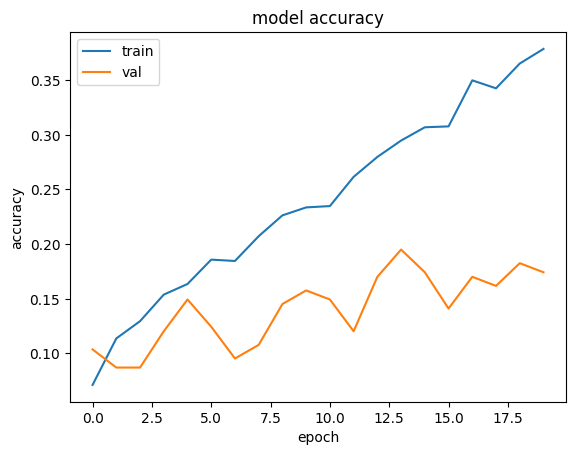

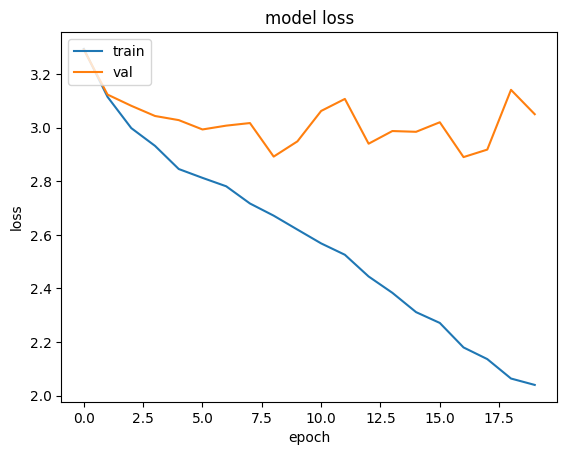

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
# Save model
model.save('model_self_28.keras')
model.save('model_self_28.h5')

In [ ]:
model = load_model('/content/gdrive/My Drive/ML/model_baru.h5')

In [ ]:
img_path = testing_dir
model_predict_28(img_path, model)

## Transfer Learning using MobileNetV2

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
model_mobilenetv2 = MobileNetV2(weights='imagenet',
                                include_top=False,
                                input_shape=(150, 150, 3))

for layer in model_mobilenetv2.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Create the model
model = tf.keras.Sequential([
    model_mobilenetv2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
# Train
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
3515/3515 [==============================] - 246s 69ms/step - loss: 0.5530 - accuracy: 0.8289 - val_loss: 0.2758 - val_accuracy: 0.9089
Epoch 2/10
3515/3515 [==============================] - 216s 61ms/step - loss: 0.2776 - accuracy: 0.9098 - val_loss: 0.2477 - val_accuracy: 0.9212
Epoch 3/10
3515/3515 [==============================] - 215s 61ms/step - loss: 0.2096 - accuracy: 0.9323 - val_loss: 0.2261 - val_accuracy: 0.9294
Epoch 4/10
3515/3515 [==============================] - 212s 60ms/step - loss: 0.1796 - accuracy: 0.9417 - val_loss: 0.2543 - val_accuracy: 0.9232
Epoch 5/10
3515/3515 [==============================] - 213s 60ms/step - loss: 0.1500 - accuracy: 0.9510 - val_loss: 0.2000 - val_accuracy: 0.9396
Epoch 6/10
3515/3515 [==============================] - 211s 60ms/step - loss: 0.1368 - accuracy: 0.9561 - val_loss: 0.2062 - val_accuracy: 0.9408
Epoch 7/10
3515/3515 [==============================] - 212s 60ms/step - loss: 0.1166 - accuracy: 0.9617 - val_loss: 0

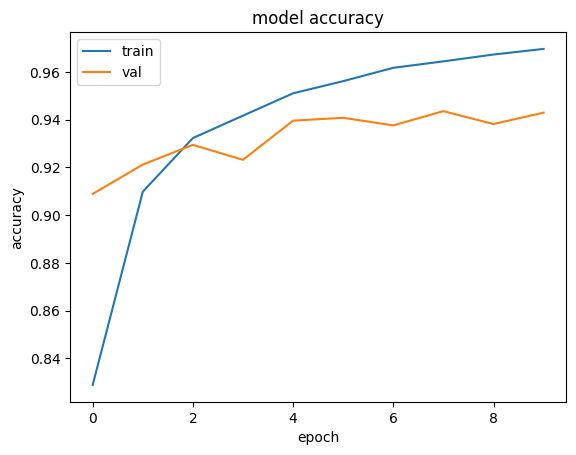

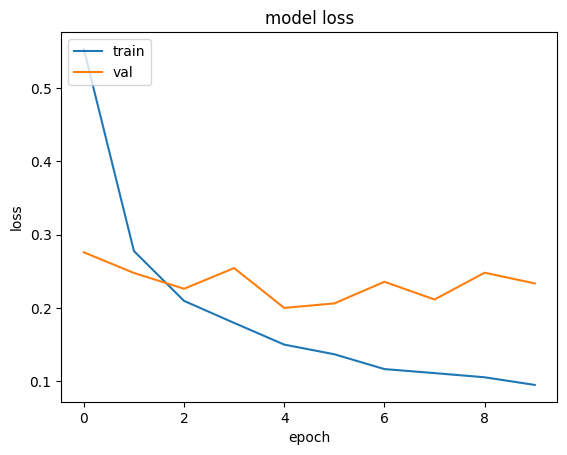

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
# Save
model.save('model_mobilenetv2_38_v2.keras')
model.save('model_mobilenetv2_38_v2.h5')

In [ ]:
model = load_model('/content/model_mobilenetv2_38_v2.h5')

In [ ]:
# Predict 38 classes
img_path = testing_dir
model_predict_38(img_path, model)

In [ ]:
# Predict 21 classes
model = load_model('/content/model_mobilenetv2_v3.h5')
img_path = testing_dir
model_predict_21(img_path, model)

## Transfer Learning using InceptionV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
model_inceptionv3 = InceptionV3(weights='imagenet',
                                include_top=False,
                                input_shape=(150, 150, 3))

for layer in model_inceptionv3.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# Create the model
model = tf.keras.Sequential([
    model_inceptionv3,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
3515/3515 [==============================] - 696s 194ms/step - loss: 1.0120 - accuracy: 0.6980 - val_loss: 0.6786 - val_accuracy: 0.7853
Epoch 2/10
3515/3515 [==============================] - 639s 182ms/step - loss: 0.6324 - accuracy: 0.8060 - val_loss: 0.5446 - val_accuracy: 0.8300
Epoch 3/10
3515/3515 [==============================] - 636s 181ms/step - loss: 0.5572 - accuracy: 0.8287 - val_loss: 0.5449 - val_accuracy: 0.8327
Epoch 4/10
3515/3515 [==============================] - 654s 186ms/step - loss: 0.5237 - accuracy: 0.8400 - val_loss: 0.4752 - val_accuracy: 0.8523
Epoch 5/10
3515/3515 [==============================] - 654s 186ms/step - loss: 0.4842 - accuracy: 0.8506 - val_loss: 0.4800 - val_accuracy: 0.8511
Epoch 6/10
3515/3515 [==============================] - 636s 181ms/step - loss: 0.4659 - accuracy: 0.8581 - val_loss: 0.4587 - val_accuracy: 0.8623
Epoch 7/10
3515/3515 [==============================] - 644s 183ms/step - loss: 0.4486 - accuracy: 0.8633 - val_

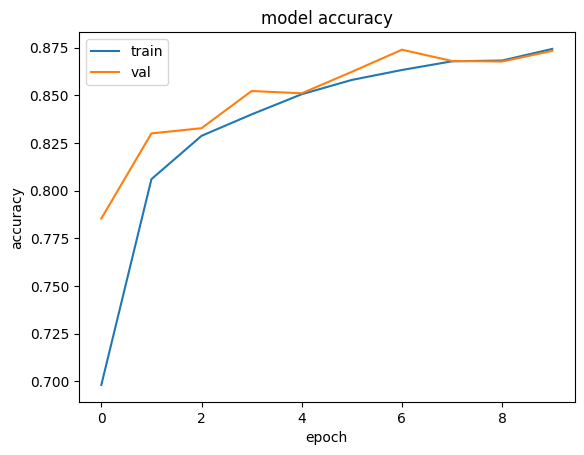

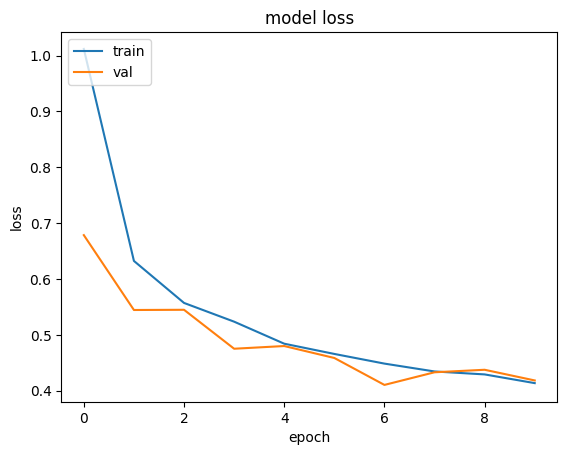

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
# Save
model.save('model_inceptionv3_38_v2.keras')
model.save('model_inceptionv3_38_v2.h5')

In [ ]:
model = load_model('/content/model_inceptionv3_38.h5')

In [ ]:
# Predict from 38 classes
img_path = testing_dir
model_predict_38(img_path, model)

## Transfer Learning using ResNet50

In [ ]:
from keras.applications import ResNet50

In [ ]:
model_resnet50 = ResNet50(weights=None,
                          include_top=False,
                          input_shape=(256, 256, 3))

for layer in model_resnet50.layers:
    layer.trainable = False

In [ ]:
# Create the model
model = tf.keras.Sequential([
    model_resnet50,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(38, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
3515/3515 [==============================] - 406s 114ms/step - loss: 3.4270 - accuracy: 0.0615 - val_loss: 3.2293 - val_accuracy: 0.1152
Epoch 2/10
3515/3515 [==============================] - 387s 110ms/step - loss: 3.0868 - accuracy: 0.1304 - val_loss: 2.9785 - val_accuracy: 0.1594
Epoch 3/10
3515/3515 [==============================] - 398s 113ms/step - loss: 2.8899 - accuracy: 0.1749 - val_loss: 2.8010 - val_accuracy: 0.1954


KeyboardInterrupt: ignored

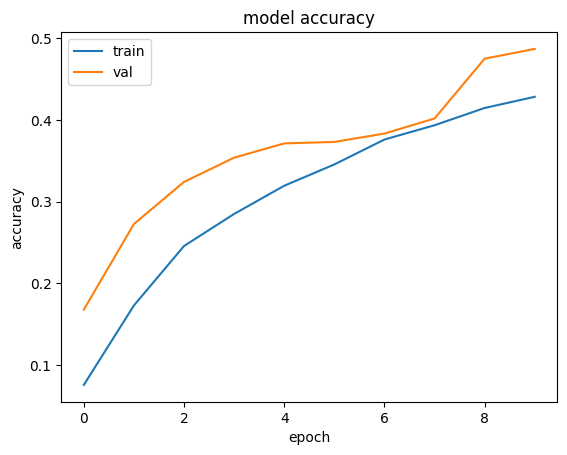

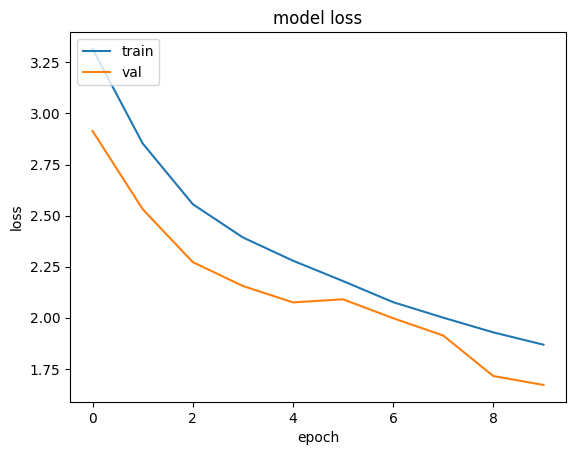

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
# Save
model.save('model_resnet_38.keras')
model.save('model_resnet_38.h5')

In [ ]:
# Predict from 38 classes
img_path = testing_dir
model_predict_38(img_path, model)